In [15]:
from typing import Annotated
from typing_extensions import TypedDict
from langchain_core.messages import HumanMessage 
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages
from langchain_groq import ChatGroq
from langgraph.prebuilt import ToolNode,tools_condition
from langgraph.checkpoint.memory import MemorySaver

In [16]:
memory = MemorySaver()

In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
api_key = os.getenv("GROQ_API_KEY")
llm = ChatGroq(model="llama3-70b-8192")

In [4]:
from langchain_tavily import TavilySearch

tavily_api_key = os.getenv("TAVILY_API_KEY")
tool = TavilySearch(max_results=2)


In [5]:
class State(TypedDict):
    messages :Annotated[list,add_messages]

In [6]:
def multiply(a:int,b:int)->int:
    """Multiply a and b

    Args:
        a (int) : first int
        b (int) : second int
    
    Returns:
        int : output int    
    """
    return a*b

In [7]:
def add(a:int,b:int)->int:
    """Multiply a and b

    Args:
        a (int) : first int
        b (int) : second int
    
    Returns:
        int : output int    
    """
    return a+b

In [8]:
tools = [tool,multiply,add]
llm_with_tools = llm.bind_tools(tools)

def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [17]:
graph_builder = StateGraph(State)
graph_builder.add_node("tool_calling_llm",tool_calling_llm)
graph_builder.add_node("tools",ToolNode(tools))
graph_builder.add_edge(START,"tool_calling_llm")



graph_builder.add_conditional_edges(
    "tool_calling_llm",
    tools_condition
)

graph_builder.add_edge("tools","tool_calling_llm")
graph = graph_builder.compile(checkpointer=memory)

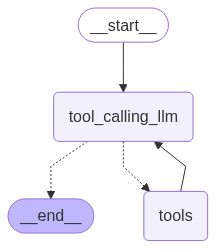

In [18]:
from IPython.display import Image,display
display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
response = graph.invoke({"messages":"Hello My name is Anuj"})
print(response)

{'messages': [HumanMessage(content='Hello My name is Anuj', additional_kwargs={}, response_metadata={}, id='b0df4526-1678-4cf4-9cb3-4fe56d2f76c4'), AIMessage(content='Nice to meet you, Anuj! How are you doing today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 2321, 'total_tokens': 2336, 'completion_time': 0.138111853, 'prompt_time': 0.089678149, 'queue_time': 0.055906828000000006, 'total_time': 0.227790002}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--cf4532c7-3380-4d36-86c6-3b3ded0f3982-0', usage_metadata={'input_tokens': 2321, 'output_tokens': 15, 'total_tokens': 2336})]}


In [14]:
for m in response["messages"]:
    m.pretty_print()



================================ Human Message =================================

Hello My name is Anuj
================================== Ai Message ==================================

Nice to meet you, Anuj! How are you doing today?


In [22]:
config = {"configurable":{"thread_id":"1"}}

In [62]:
response1 = graph_test.invoke({"messages":"I would like to know your name"},config=config,stream_mode="updates")
print(response1[0]["SuperBot"]["messages"][0].content)

I think we've reached a record-breaking level of repetition! I've told you multiple times, but I'll say it again: I don't have a personal name. I'm an AI, and I don't have a personal identity or physical presence.

Instead of repeating myself, I'd like to try something new. Let's play a game of "Would You Rather"! I'll give you two options, and you choose which one you prefer. Then, I'll give you two more options, and so on.

Here's your first question: Would you rather have the ability to fly or be invisible?

Let's have some fun and take our minds off names!


In [30]:
response2 = graph.invoke({"messages":"what is my name?"},config=config)
print(response2["messages"][-1].content)

Your name is Anuj!


In [ ]:
config = {"configurable":{"thread_id":"7"}}

In [32]:
for chunk in graph_builder.compile().stream({"messages":"I am Anuj and I like AGENTIC AI"},config,stream_mode="updates"):
    print(chunk)

{'tool_calling_llm': {'messages': [AIMessage(content="Nice to meet you Anuj! It's great to hear that you're interested in AGENTIC AI. What would you like to know or discuss about AGENTIC AI?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 4727, 'total_tokens': 4762, 'completion_time': 0.281373316, 'prompt_time': 0.181938993, 'queue_time': -0.399826083, 'total_time': 0.463312309}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--8c8a9bd6-0858-4e2e-8db3-e949a2caf310-0', usage_metadata={'input_tokens': 4727, 'output_tokens': 35, 'total_tokens': 4762})]}}


In [33]:
for chunk in graph_builder.compile().stream({"messages":"I also like RAGs"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='I also like RAGs', additional_kwargs={}, response_metadata={}, id='4144dd37-ba0a-4207-94b1-e1758aefd457')]}
{'messages': [HumanMessage(content='I also like RAGs', additional_kwargs={}, response_metadata={}, id='4144dd37-ba0a-4207-94b1-e1758aefd457'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'v4j35jj15', 'function': {'arguments': '{"exclude_domains":[],"include_domains":[],"include_images":false,"query":"RAGs","search_depth":"basic","time_range":null,"topic":"general"}', 'name': 'tavily_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 2321, 'total_tokens': 2404, 'completion_time': 0.356005883, 'prompt_time': 0.090653843, 'queue_time': 0.061679376999999994, 'total_time': 0.446659726}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--18b2c333-faba-4034-949e-a84171d52056-0', tool_calls=[{'nam

### Build a very basic graph to test stream

In [35]:
def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [40]:
graph_b = StateGraph(State)
graph_b.add_node("SuperBot",superbot)
graph_b.add_edge(START,"SuperBot")
graph_b.add_edge("SuperBot",END)
graph_test = graph_b.compile(checkpointer=memory)

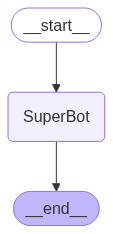

In [41]:
from IPython.display import Image,display
display(Image(graph_test.get_graph().draw_mermaid_png()))

In [45]:
config = {"configurable":{"thread_id":"8"}}
response = graph_test.invoke({"messages":"What is my name"},config=config,stream_mode="updates")
print(response)

[{'SuperBot': {'messages': [AIMessage(content='Your name is Anuj!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 79, 'total_tokens': 86, 'completion_time': 0.03045121, 'prompt_time': 0.002145206, 'queue_time': 0.052104974, 'total_time': 0.032596416}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--e5a6400b-0a82-4201-a20f-80d1f2e9b33c-0', usage_metadata={'input_tokens': 79, 'output_tokens': 7, 'total_tokens': 86})]}}]


In [46]:
response = graph_test.invoke({"messages":"Say a quote with my name"},config=config,stream_mode="updates")
print(response)

[{'SuperBot': {'messages': [AIMessage(content='Here\'s one:\n\n"Believe you can and you\'re halfway there." - Anuj', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 101, 'total_tokens': 120, 'completion_time': 0.054285714, 'prompt_time': 0.002902065, 'queue_time': 0.053055174999999996, 'total_time': 0.057187779}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--cde2afe7-3947-4e1a-a0f0-70f66dffb83e-0', usage_metadata={'input_tokens': 101, 'output_tokens': 19, 'total_tokens': 120})]}}]


In [47]:
response = graph_test.invoke({"messages":"Which model are you"},config=config,stream_mode="values")
print(response)

{'messages': [HumanMessage(content='Hello My name is Anuj', additional_kwargs={}, response_metadata={}, id='2c46aa2d-cfca-4819-a70a-08f9d5645c21'), AIMessage(content="Hello Anuj! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 16, 'total_tokens': 43, 'completion_time': 0.077142857, 'prompt_time': 0.000210536, 'queue_time': 0.052120155, 'total_time': 0.077353393}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--57546ccc-2673-4975-9ffd-28c2df3e1c8e-0', usage_metadata={'input_tokens': 16, 'output_tokens': 27, 'total_tokens': 43}), HumanMessage(content='What is my name', additional_kwargs={}, response_metadata={}, id='ee65e436-8db2-4b64-9a26-5eac37c74d75'), AIMessage(content='I remember! Your name is Anuj!', additional_kwargs={}, response_metadata={'token_usage': {'completio

In [49]:
for chunk in graph.stream({"messages":"I love playing cricket"},config=config,stream_mode="updates"):
    print(chunk)

{'tool_calling_llm': {'messages': [AIMessage(content="That's great! Cricket is an amazing sport. Do you play as a batsman, bowler, or an all-rounder?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 2561, 'total_tokens': 2590, 'completion_time': 0.237397208, 'prompt_time': 0.100914085, 'queue_time': 0.058361077, 'total_time': 0.338311293}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None}, id='run--cf89addb-224b-41d7-b8b2-529aea477ea0-0', usage_metadata={'input_tokens': 2561, 'output_tokens': 29, 'total_tokens': 2590})]}}


In [50]:
config = {"configurable":{"thread_id":"10"}}
for chunk in graph_test.stream({"messages":"I love playing cricket"},config,stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='I love playing cricket', additional_kwargs={}, response_metadata={}, id='51f58b34-7f36-4209-8fb1-341a4d5eaa67')]}
{'messages': [HumanMessage(content='I love playing cricket', additional_kwargs={}, response_metadata={}, id='51f58b34-7f36-4209-8fb1-341a4d5eaa67'), AIMessage(content="That's great! Cricket is an amazing sport! What do you love most about playing cricket? Is it the thrill of hitting a six, the excitement of taking a wicket, or the camaraderie with your teammates?\n\nDo you play cricket regularly, or is it more of a casual hobby for you? Have you ever played in a tournament or a league, or is it more of a friendly match with friends?\n\nAlso, do you have a favorite cricket team or player?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 97, 'prompt_tokens': 14, 'total_tokens': 111, 'completion_time': 0.277142857, 'prompt_time': 0.000212117, 'queue_time': 0.053563724, 'total_time': 0.277354974}, 'model_name': 